<h1>Double Pendulum Problem</h1>

This notebook is created to animate the motion of double pendulums using the equation (11.37) and (11.38) of Taylor classical mechanics. From the Taylor solution, we have

<h4>potential energy:</h4>
    
\begin{align}
  U(\phi1 , \phi_2) = (m_1 + m_2)g L_1 (1-\cos\phi_1) + m_2 g L_2(1-\cos\phi_2)
\end{align}
    
<h4>kinetic energy:</h4> 
\begin{align}
   T(\dot\phi_1 , \dot\phi_2) = \frac12 (m_1+m_2)L_1^2 \dot\phi_1 + m_2 L_1 L_2 \dot\phi_2\cos(\phi_1-\phi_2)+\frac12 m_2 L_2^2\dot\phi_1^2
\end{align}
    
    
Then, Lagrangian is just T-U:


<h3>Applying E-L equation, we got the following two deffrential equations</h3>
\begin{align}
 (1): \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_1} = \frac{\partial\mathcal L}{\partial\phi_1}
 \Longrightarrow &
 (m_1 + m_2) L_1 \ddot \phi_1 + m_2  L_2 \ddot \phi_2 \cos(\phi_1 - \phi_2) -m_2  L_2 \dot\phi_2 \sin(\phi_1-\phi_2)(\dot\phi_1 - \dot \phi_2)\\
 &= -m_2  L_2 \dot\phi_1 \phi_2 \sin(\phi_1 - \phi_2) - (m_1 + m_2)  g \sin\phi_1 
\end{align}
\begin{align}
   (2):\frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_2} = \frac{\partial\mathcal L}{\partial\phi_2}
  \Longrightarrow &
 m_2 L_2 \ddot \phi_2 + m_2 L_1  \ddot \phi_1 \cos(\phi_1 - \phi_2) -m_2 L_1  \dot\phi_1 \sin(\phi_1-\phi_2)(\dot\phi_1 - \dot \phi_2)\quad\quad\quad\\
 &= m_2 L_1  \dot\phi_1 \phi_2 \sin(\phi_1 - \phi_2) - m_2  g \sin\phi_2.
\end{align}

After simplification, we reached a coupled system of second order differential equation: 
\begin{align}
(3)\ddot\phi_1+\alpha_1(\phi_1,\phi_2)\ddot\phi_2 = f_1(\phi_1, \phi_2, \dot\phi_1, \dot\phi_2)
\end{align}
\begin{align}
(4)\ddot\phi_2+\alpha_2(\phi_1,\phi_2)\ddot\phi_1 = f_2(\phi_1, \phi_2, \dot\phi_1, \dot\phi_2)
\end{align}
where $\alpha_1, \alpha_2$ are:
\begin{align}
\alpha_1=\frac{L_2}{L_1}(\frac{m_2}{m2+m_1})cos(\phi_1-\phi_2)
\end{align}
\begin{align}
\alpha_2=\frac{L_1}{L_2}cos(\phi_1-\phi_2)
\end{align}
and $f_1, f_2$ are:
\begin{align}
f_1=-\frac{L_2}{L_1}(\frac{m_2}{m_1+m_2})\dot\phi_2^2\sin(\phi_1-\phi_2)-\frac{g}{L_1}\sin\phi_1
\end{align}\begin{align}
f_2=-\frac{L_1}{L_2}\dot\phi_1^2\sin(\phi_1-\phi_2)-\frac{g}{L_2}\sin\phi_2
\end{align}


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, cos
from scipy.integrate import solve_ivp

In [14]:
fontsize=15

<h3>Python class of Double Pendulum</h3>

In [58]:
class DoublePendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
    double pendulums (no driving or damping).
     
    Parameters
    ----------
    L1 : float
        length of the first pendulum
    L2 : float
        length of the second pendulum
    g : float
        gravitational acceleration at the earth's surface
    mass1 : float
        mass of the first pendulum
    mass2 : float
        mass of the second pendulum

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vectors y1 and y2, 
        given time t and the corresponding values of y1 and y2.
    """

    def __init__(self, L1=1., m1=1., L2=1., m2=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = m1
        self.m2 = m2
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of two diffeqs: 
        [dphi1_dt, d^2phi1_dt^2, dphi2_dt, d^2phi2_dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with 
            y[0] = phi1 
            y[1] = phi1 dot
            y[2] = phi2 
            y[3] = phi2 dot
            
        Returns
        -------
        dy_dx: float
            A 4-component vector with 
            A[0] = phi1 dot
            A[1] = phi1 ddot
            A[2] = phi2 dot
            A[3] = phi2 ddot
        
        """
        m1 = self.m1
        m2 = self.m2
        L1 = self.L1
        L2 = self.L2
        g = self.g
        A = np.zeros_like(y)
        A[0] = y[1]
        diff = y[2] - y[0]
        frac1 = (m1 + m2)*L1 - m2*L1*np.cos(diff)*np.cos(diff)
        A[1] = (m2*L1*y[1]*y[1]*np.sin(diff)*np.cos(diff) +m2*g*np.sin(y[2])*np.cos(diff) +m2*L2*y[3]*y[3]*np.sin(diff) 
                -(m1 + m2)*g*sin(y[0]))/frac1
        A[2] = y[3]
        frac2 = (L2/L1)*frac1
        A[3] = (-m2*L2*y[3]*y[3]*np.sin(diff)*np.cos(diff) +(m1 + m2)*g*np.sin(y[0])*np.cos(diff) -
                (m1 + m2)*L1*y[1]*y[1]*np.sin(diff) -
               (m1 + m2)*g*np.sin(y[2]))/frac2
        
        return A

    def solve_ode(self, t_pts, phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0,
                  abserr=1.0e-11, relerr=1.0e-11):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        
        phi_1, phi_1_dot, phi_2, phi_2_dot = solution.y
        return phi_1, phi_1_dot, phi_2, phi_2_dot

In [62]:
# setups of pendulums 
L1=1
L2=1
m1=1
m2=1
g=1
p1 = DoublePendulum()
t_pts = np.arange(0, 100, 0.001)
phi_1_0, phi_2_0=np.pi/2, np.pi
phi_1_dot_0,phi_2_dot_0=0.,0.
phi_1, phi_1_dot, phi_2, phi_2_dot = p1.solve_ode(t_pts, phi_1_0=phi_1_0, phi_1_dot_0=phi_1_dot_0, 
                                                  phi_2_0=phi_2_0, phi_2_dot_0=phi_2_dot_0)

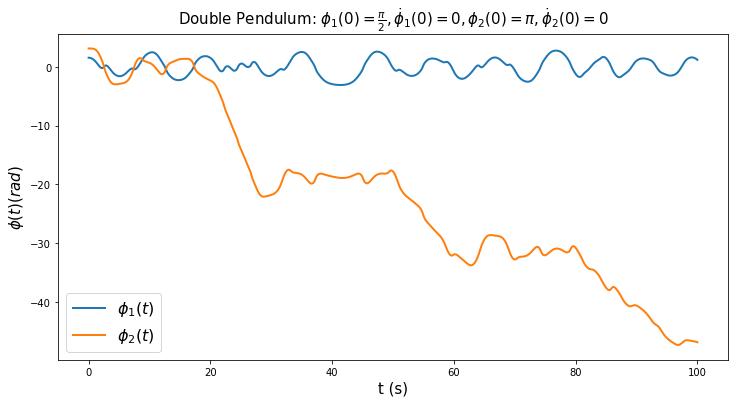

In [63]:
#output
plt.figure(figsize=(12,6))
plt.title(r'Double Pendulum: $\phi_1(0)=\frac{\pi}{2}, \dot\phi_1(0)=0, \phi_2(0)=\pi, \dot\phi_2(0)=0$', fontsize=fontsize)
plt.xlabel(r't (s)', fontsize=fontsize)
plt.ylabel(r'$\phi(t) (rad)$', fontsize=fontsize)
plt.plot(t_pts, phi_1, linewidth=2.0, label='$\phi_1(t)$')
plt.plot(t_pts, phi_2, linewidth=2.0, label='$\phi_2(t)$')
plt.legend(fontsize=16)

<h3>Showing Chaotic</h3>

The purpose of this part is showing the chaotic pattern of this system.So i made small changes on the initial condition of both pendulums, and then plot $\Delta\phi_1(t)=|\phi_1(t)-\phi_1'(t)|$ and $\Delta\phi_2(t)=|\phi_2(t)-\phi_2'(t)|$

In [67]:
# basic output to check the results
p1 = DoublePendulum()
t_pts = np.arange(0, 500, 0.01)
phi_1_0=np.pi/2
phi_1_dot_0=0.
phi_2_0=np.pi
phi_2_dot_0=0.

phi_1, phi_1_dot, phi_2, phi_2_dot = p1.solve_ode(t_pts, phi_1_0=phi_1_0, phi_1_dot_0=phi_1_dot_0, 
                                                  phi_2_0=phi_2_0, phi_2_dot_0=phi_2_dot_0)

phi_1_2, phi_1_dot_2, phi_2_2, phi_2_dot_2 = p1.solve_ode(t_pts, phi_1_0=phi_1_0+0.01, phi_1_dot_0=phi_1_dot_0, 
                                                  phi_2_0=phi_2_0+0.01, phi_2_dot_0=phi_2_dot_0)

dphi_1 = np.abs(phi_1_2 - phi_1)
dphi_2 = np.abs(phi_2_2 - phi_2)

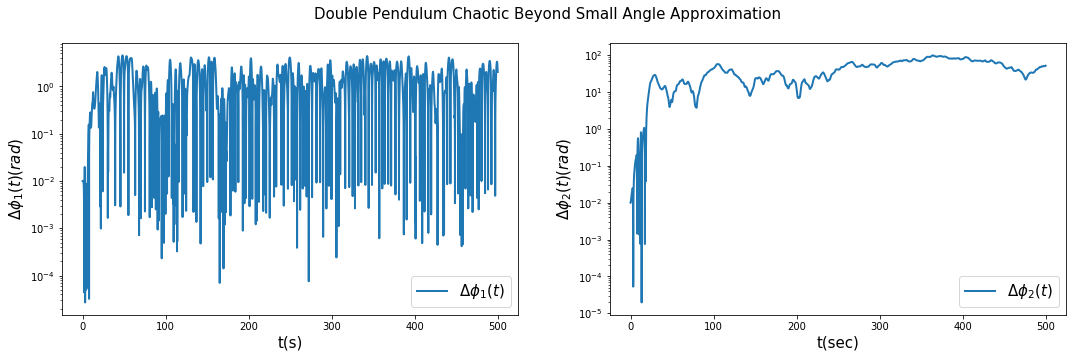

In [75]:
# plot our delta_phi to see the chaos
plt.figure(figsize=(18,5))
plt.suptitle(r'Double Pendulum Chaotic Beyond Small Angle Approximation', fontsize=fontsize)
plt.subplot(1,2,1)
plt.semilogy(t_pts, dphi_1, linewidth=2.0, label='$\Delta\phi_1(t)$')
plt.xlabel(r't(s)', fontsize=fontsize)
plt.ylabel(r'$\Delta\phi_1(t) (rad)$', fontsize=fontsize)
plt.legend(fontsize=fontsize)

plt.subplot(1,2,2)
plt.semilogy(t_pts, dphi_2, linewidth=2.0, label='$\Delta\phi_2(t)$')
plt.xlabel(r't(sec)', fontsize=fontsize)
plt.ylabel(r'$\Delta\phi_2(t)(rad)$', fontsize=fontsize)
plt.legend(fontsize=fontsize)

As showned above, none of the pendulum's difference convert into zero as time grows. Thus i showed that the system is chaotic.